# Questão 1

In [4]:
import pandas as pd
df = pd.read_csv("https://raw.githubusercontent.com/rfordatascience/tidytuesday/main/data/2019/2019-07-30/video_games.csv")

df

,number,game,release_date,price,owners,developer,publisher,average_playtime,median_playtime,metascore
0,1,Half-Life 2,"Nov 16, 2004",9.99,"10,000,000 .. 20,000,000",Valve,Valve,110.0,66.0,96.0
1,3,Counter-Strike: Source,"Nov 1, 2004",9.99,"10,000,000 .. 20,000,000",Valve,Valve,236.0,128.0,88.0
2,21,Counter-Strike: Condition Zero,"Mar 1, 2004",9.99,"10,000,000 .. 20,000,000",Valve,Valve,10.0,3.0,65.0
3,47,Half-Life 2: Deathmatch,"Nov 1, 2004",4.99,"5,000,000 .. 10,000,000",Valve,Valve,0.0,0.0,NaN
4,36,Half-Life: Source,"Jun 1, 2004",9.99,"2,000,000 .. 5,000,000",Valve,Valve,0.0,0.0,NaN
...,...,...,...,...,...,...,...,...,...,...
26683,8842,Draw Near,"Apr 15, 2018",NaN,"0 .. 20,000",Omniscience,Taiga Nishimura,0.0,0.0,NaN
26684,8843,Alone,"May 1, 2018",0.99,"0 .. 20,000",Killed Pixel Games,Killed Pixel Games,0.0,0.0,NaN
26685,8844,qrth-phyl,"Jul 19, 2018",4.99,"0 .. 20,000",Verran,Verran,0.0,0.0,NaN
26686,8845,Guns and Notes,"Jan 26, 2018",9.99,"0 .. 20,000",VR Factory,VR Factory,0.0,0.0,NaN


# Gráfico em barras com top 10 jogos com maior tempo médio de jogo

C:\Users\gustavo.gimenes\AppData\Local\Temp\ipykernel_12336\4038105319.py:18: UserWarning: Glyph 20161 (\N{CJK UNIFIED IDEOGRAPH-4EC1}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
C:\Users\gustavo.gimenes\AppData\Local\Temp\ipykernel_12336\4038105319.py:18: UserWarning: Glyph 29579 (\N{CJK UNIFIED IDEOGRAPH-738B}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
c:\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 20161 (\N{CJK UNIFIED IDEOGRAPH-4EC1}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
c:\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 29579 (\N{CJK UNIFIED IDEOGRAPH-738B}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


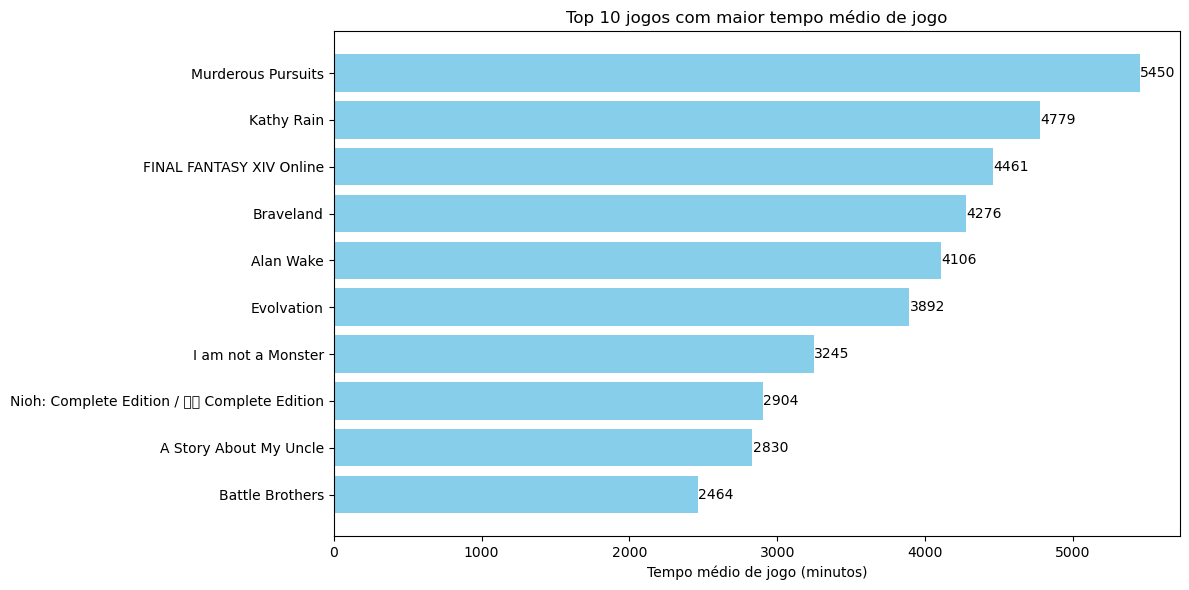

In [ ]:
import matplotlib.pyplot as plt

top_playtime = df[['game', 'average_playtime']].sort_values(by='average_playtime', ascending=False).head(10)

# Plotar o gráfico de barras
plt.figure(figsize=(12, 6))
bars = plt.barh(top_playtime['game'], top_playtime['average_playtime'], color='skyblue')
plt.xlabel('Tempo médio de jogo (minutos)')
plt.title('Top 10 jogos com maior tempo médio de jogo')
plt.gca().invert_yaxis()  # Coloca o maior valor no topo

# Adicionar rótulos às barras
for bar in bars:
    plt.text(bar.get_width() + 2, bar.get_y() + bar.get_height()/2,
             f'{bar.get_width():.0f}', va='center')

plt.tight_layout()
plt.show()


# Gráfico de dispersão para verificar se há relação entre o tempo médio de jogo e o preço do jogo

C:\Users\gustavo.gimenes\AppData\Local\Temp\ipykernel_12336\1302119528.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['price'] = pd.to_numeric(df['price'], errors='coerce')


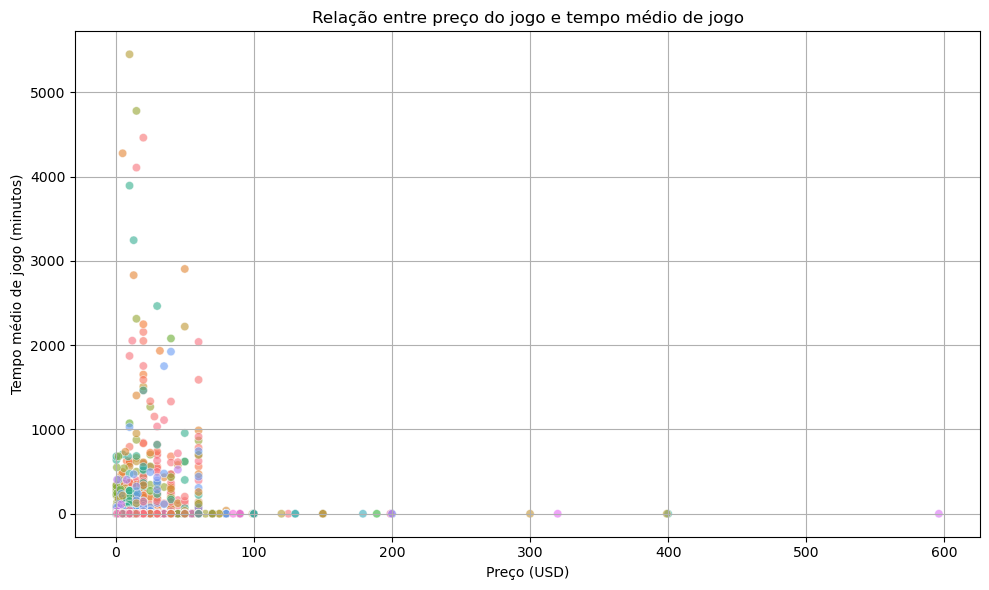

In [10]:
import seaborn as sns

# Converter a coluna de preço para tipo numérico (alguns podem ter problemas de formatação)
df['price'] = pd.to_numeric(df['price'], errors='coerce')

# Filtrar dados válidos
valid_data = df.dropna(subset=['price', 'average_playtime'])

# Criar gráfico de dispersão
plt.figure(figsize=(10, 6))
sns.scatterplot(data=valid_data, x='price', y='average_playtime', hue='developer', legend=False, alpha=0.6)

plt.xlabel('Preço (USD)')
plt.ylabel('Tempo médio de jogo (minutos)')
plt.title('Relação entre preço do jogo e tempo médio de jogo')
plt.grid(True)
plt.tight_layout()
plt.show()


# Histograma com a distribuição de notas Metascore

C:\Users\gustavo.gimenes\AppData\Local\Temp\ipykernel_12336\2258174437.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['metascore'] = pd.to_numeric(df['metascore'], errors='coerce')


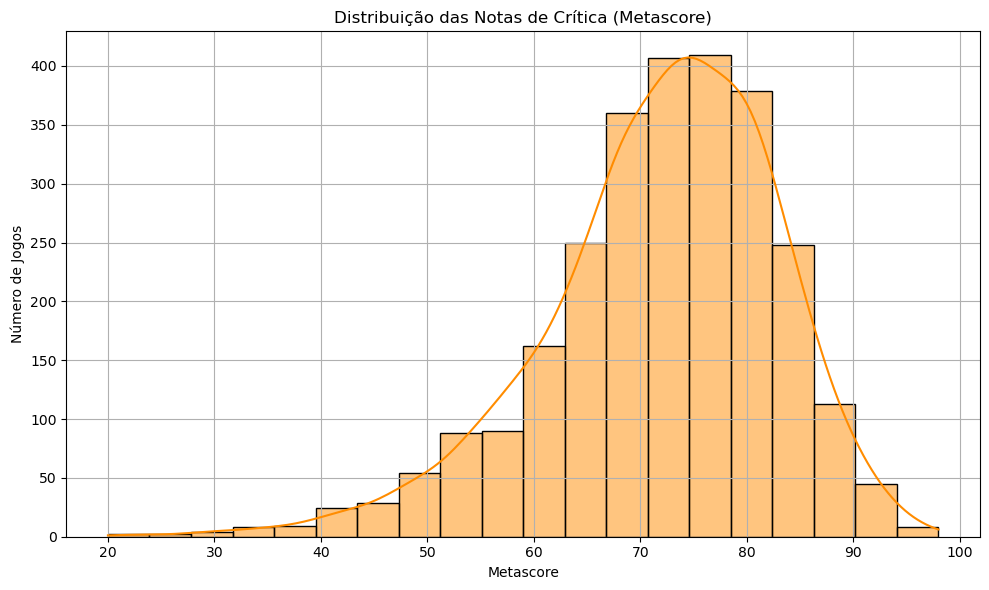

In [22]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


# Converter metascore para numérico e remover nulos
df['metascore'] = pd.to_numeric(df['metascore'], errors='coerce')
df_clean = df.dropna(subset=['metascore'])

# Plotar histograma com Seaborn
plt.figure(figsize=(10, 6))
sns.histplot(df_clean['metascore'], bins=20, kde=True, color='darkorange')

plt.xlabel('Metascore')
plt.ylabel('Número de Jogos')
plt.title('Distribuição das Notas de Crítica (Metascore)')
plt.grid(True)
plt.tight_layout()
plt.show()


# Gráfico com linha de tendência do tempo médio de um jogo

C:\Users\gustavo.gimenes\AppData\Local\Temp\ipykernel_12336\679988379.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['release_date'] = pd.to_datetime(df['release_date'], errors='coerce')
C:\Users\gustavo.gimenes\AppData\Local\Temp\ipykernel_12336\679988379.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['year'] = df['release_date'].dt.year


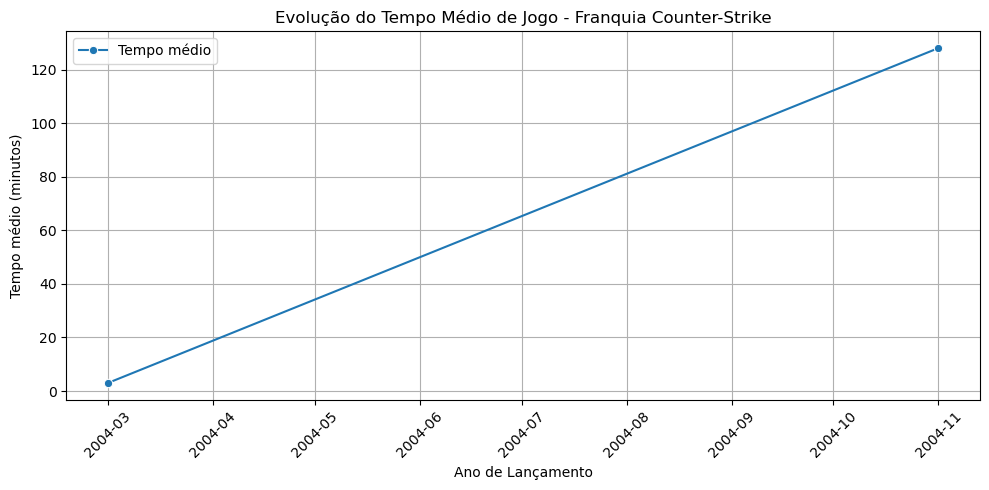

In [20]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

df['release_date'] = pd.to_datetime(df['release_date'], errors='coerce')
df['year'] = df['release_date'].dt.year

# Filtrar jogos da franquia "Counter-Strike"
cs_games = df[df['game'].str.contains("Counter-Strike", case=False, na=False)]

# Ordenar por data
cs_games = cs_games.sort_values(by='release_date')

# Plotar gráfico de linha
plt.figure(figsize=(10, 5))
sns.lineplot(data=cs_games, x='release_date', y='median_playtime', marker='o', label="Tempo médio")
plt.xticks(rotation=45)
plt.title("Evolução do Tempo Médio de Jogo - Franquia Counter-Strike")
plt.xlabel("Ano de Lançamento")
plt.ylabel("Tempo médio (minutos)")
plt.grid(True)
plt.tight_layout()
plt.show()
